### Task No. 1: Inspect Data


In [220]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [221]:
# 1. load all the csv(s) and merge them into one 
# DataFrame
import glob
files_path = r'C:\Users\ACER\Desktop\Assingment No. 1 Prep'
files = glob.glob(files_path + '/*.csv')

us_states_data = []
for file_path in files: 
    DataFrame = pd.read_csv(file_path, index_col=None, header=0)
    # comparing by state to redact the inventory data
    if 'State' in DataFrame.columns:
        us_states_data.append(DataFrame)

# Concatenating the US States' data into 1 DF
us_census = pd.concat(us_states_data, ignore_index=True)

In [222]:
# 3
display(us_census.columns, us_census.dtypes)
# Yes, it will hinder the process as
# Object is a complex dtype to deal with.

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
               ...  
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
Length: 11, dtype: object

In [223]:
# 4
display(us_census.head())
# there are some non Numeric ASCII characters here 
# so the PD lib considers them to be coplex 'object' 
# data type
# PLAN: We should use apply function in tandem with 
# regex to overcome this problem

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [224]:
# I drop the annoying Unnamed column index here
us_census.drop(us_census.columns[us_census.columns.str.contains('Unnamed')], axis=1)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
...,...,...,...,...,...,...,...,...,...,...
55,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F
56,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M_4195682F
57,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M_3497739F
58,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M_937789F


In [225]:
# 5, transform the Income column into a numeric one

# --> Uncomment if necessary
us_census['Income']=us_census.Income.apply(lambda a: a[1:])
display(us_census)

# convert the datatype
us_census.Income = us_census.Income.astype('float')


,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.78230266465,19087135M_19334329F
...,...,...,...,...,...,...,...,...,...,...,...
55,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,55602.96721311475,308573M_318031F
56,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,72866.01341201717,4060948M_4195682F
57,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,64493.76768377254,3487725M_3497739F
58,4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,41437.11157024794,913631M_937789F


In [226]:
# 6: Look at the GenderPop Column
display(us_census.GenderPop)

# transform the GenderPop column into two columns


0       2341093M_2489527F
1         384160M_349215F
2       3299088M_3342840F
3       1451913M_1506295F
4     19087135M_19334329F
             ...         
55        308573M_318031F
56      4060948M_4195682F
57      3487725M_3497739F
58        913631M_937789F
59      2851385M_2890732F
Name: GenderPop, Length: 60, dtype: object

In [227]:
us_census[['Male', 'Female']] = us_census['GenderPop'].str.split('_', expand=True)

# WHY IS EXPAND USED HERE ??
# Expands the split strings into separate columns.
# **If True, return DataFrame/MultiIndex expanding dimensionality.
# **If False, return Series/Index, containing lists of strings.
# (OFFICIAL DOCS)

display(us_census[['Male', 'Female']])
# now drop the column GenderPop
us_census.drop(['GenderPop'], axis=1,inplace=True)

,Male,Female
0,2341093M,2489527F
1,384160M,349215F
2,3299088M,3342840F
3,1451913M,1506295F
4,19087135M,19334329F
...,...,...
55,308573M,318031F
56,4060948M,4195682F
57,3487725M,3497739F
58,913631M,937789F


In [228]:
# 7
# Convert both of the columns into numerical ones
# First remove M and F from the end of each value 
# new columns created
def remove_last_char(x):
    return x[:len(x)-1]

us_census.Male = us_census.Male.apply(remove_last_char)
us_census.Female = us_census.Female.apply(remove_last_char)

In [229]:
# Converting datatypes: make the dtype 'int' because
# 'count of a quantity(population)' is a Discrete
# Random Variable

us_census.Male = us_census.Male.astype('int')

# some values are missing so putting them manually here 
# with average value: 3222092
us_census.iloc[[23, 24, 31], 11] = '3222092'
# now convert the values to another type 
us_census.Female = us_census.Female.astype('int')

In [230]:
# ****** ALL GOOD ****** # 

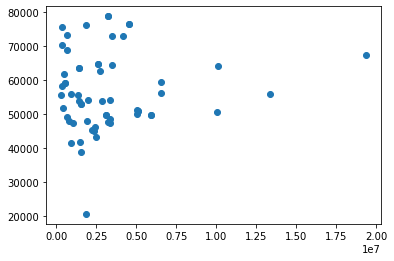

In [231]:
# 8: Using Matplotlib to construct scatter plots
plt.scatter(us_census.Female, us_census.Income)
plt.show()

In [232]:
# 9
# Print out your column with the number of women 
# per state to see

# women per state estimate
females_estimate = us_census.TotalPop-us_census.Male

# filling NA entries
us_census.Female.fillna(females_estimate, inplace=True)

In [233]:
# 10: Check for duplicate values 
display(us_census.duplicated())

# 11: Remove the duplicate values
us_census.drop_duplicates(inplace=True)

0     False
1     False
2     False
3     False
4     False
      ...  
55    False
56    False
57    False
58    False
59    False
Length: 60, dtype: bool

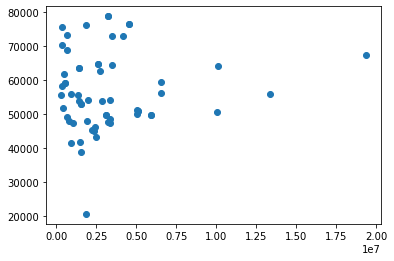

In [234]:
# 12: Make the scatter plot again
plt.scatter(us_census.Female, us_census.Income)
plt.show()

In [235]:
us_census.drop(us_census.columns[us_census.columns.str.contains('Unnamed')], axis=1, inplace=True)

In [236]:
# 13: Making Histograms
# remove the % signs from all applicable columns


In [237]:
us_census.Hispanic = us_census.Hispanic.apply(remove_last_char)

In [238]:
us_census.White = us_census.White.apply(remove_last_char)
us_census.Black = us_census.Black.apply(remove_last_char)
us_census.Native = us_census.Native.apply(remove_last_char)
us_census.Asian = us_census.Asian.apply(remove_last_char)

In [239]:
us_census.Hispanic = us_census.Hispanic.astype('float')
us_census.White = us_census.White.astype('float')
us_census.Black = us_census.Black.astype('float')
us_census.Native = us_census.Native.astype('float')
us_census.Asian = us_census.Asian.astype('float')

In [240]:
# Making histograms now
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.03435374149659865%,43296.358603,2341093,2489527
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.0586826347305378%,70354.743902,384160,349215
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.16763157894736833%,54207.820955,3299088,3342840
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.14686131386861315%,41935.633968,1451913,1506295
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.35141038442336353%,67264.782303,19087135,19334329
...,...,...,...,...,...,...,...,...,...,...,...
55,Vermont,626604,1.609290,93.983060,0.980874,0.301639,1.238798,0.03060109289617486%,55602.967213,308573,318031
56,Virginia,8256630,8.011016,63.271048,20.175998,0.212453,5.455242,0.06471527408195847%,72866.013412,4060948,4195682
57,Washington,6985464,11.140969,72.038408,3.384429,1.410727,7.022007,0.609896193771627%,64493.767684,3487725,3497739
58,West Virginia,1851420,1.290909,92.176240,3.662810,0.152686,0.682438,0.02644628099173554%,41437.111570,913631,937789


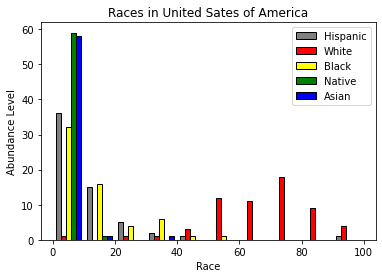

In [245]:
plt.hist([us_census.Hispanic, us_census.White, us_census.Black, us_census.Native, us_census.Asian],
         color=['grey', 'red', 'yellow', 'green', 'blue'],
         label=['Hispanic', 'White', 'Black', 'Native', 'Asian'],
         bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],edgecolor='black'
)
plt.title('Races in United Sates of America')
plt.legend(loc='best')
plt.xlabel('Race')
plt.ylabel('Abundance Level')

# show the plot
plt.show()

## PART II 
*Learn Data Ananlysis With Pandas*

In [249]:
# Answer Customer Emails
# 1 
path = r'C:\Users\ACER\Desktop\Assingment No. 1 Prep\inventory.csv'
inventory = pd.read_csv(path)
inventory.head()

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99


In [250]:
# 2 
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [256]:
# 3 
staten_island = inventory.iloc[[x for x in range(10)]]
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [262]:
# 4
product_request = staten_island['product_description']

# 5
seed_request = inventory.product_type[inventory.location == 'Brooklyn']
seed_request

10           seeds
11           seeds
12           seeds
13    garden tools
14    garden tools
15    garden tools
16    pest_control
17    pest_control
18         planter
19         planter
Name: product_type, dtype: object

In [282]:
# 6 
inventory['in_stock'] = inventory.quantity > 0
# 7
inventory['total_value'] = inventory.price * inventory.quantity
# 8
combine_lambda = lambda x:'{}-{}'.format(x.product_type, x.product_description)
# 9: I am sorry but this one is not working! 
inventory.loc[['product_type', 'product_description']]

KeyError: "None of [Index(['product_type', 'product_description'], dtype='object')] are in the [index]"